In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# This analysis follows the following guide on Kaggle.com:
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
# Additonal explanations by me have been added.

# In other doc, I will do linear regression. Regularized linear regression. Yeah.
# That's from here: https://www.kaggle.com/apapiu/regularized-linear-models
# Look I'll come up with something original one day, but right now
# I'm just focussing on understanding what these guys are doing.

# as a background, I usually do stats in R, but I program in python.
# I kinda wanna do stats in python, so I can work with all the libraries like
# numpy, pandas, matplotlib, etc., so that's why I'm doing this project.

In [2]:
# read training data
df_train = pd.read_csv('data/train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# look at the dependent variable
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

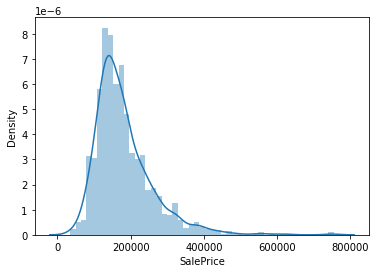

In [5]:
# histogram
sns.distplot(df_train['SalePrice'])

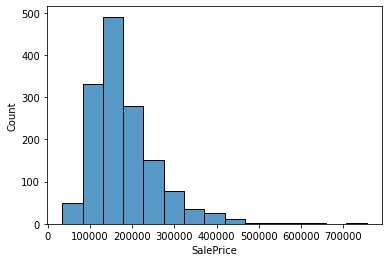

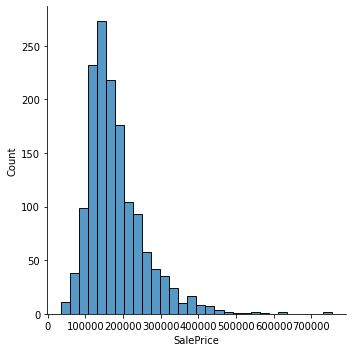

In [6]:
# On the seaborn documentation, they say to use histplot/displot instead of distplot.
# note: you can also use the bins parameter to change the number of bars in the histogram.
sns.histplot(df_train['SalePrice'], bins=15)
sns.displot(df_train['SalePrice'], bins=30)

In [7]:
# SalePrice is positively(right) skewed, unimodal. Deviates from the normal distribution. Cool.
# let's look at skewness/kurtosis now
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

# so it's positively skewed. That's cool.
# Kurtosis: lower number --> closer to the normal distribution. Higher Kurtosis data sets tend to have heavy tails
# and outliers, which is what is observed here. Good.

Skewness: 1.882876
Kurtosis: 6.536282


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

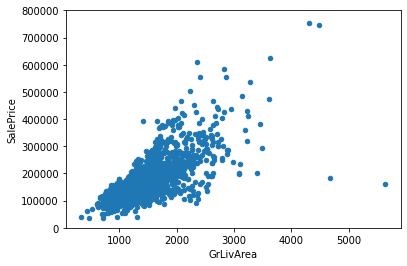

In [8]:
# Compare GrLivArea and SalePrice using a scatterplot
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
# concatenates these to columns on the "column" axis, so this basically creates a two column data frame.

data.plot(x=var, y='SalePrice', kind='scatter', ylim=(0, 800000))

# on the guide, he did data.plot.scatter instead of data.plot(kind='scatter')... idk what that does so I won't use.
# Positive linear association, seems to be a few outliers.

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

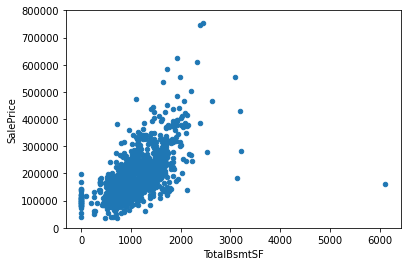

In [9]:
# Compare TotalBsmtSF and SalePrice as well
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot(x=var, y='SalePrice', kind='scatter', ylim=(0, 800000))

# Seems like a positive linear association, but also could be quadratic/exponential.
# less strength than previous plot. Also, when the BsmtSF=0, aka there is no basement,
# variables aren't correlated at all basically.

[Text(0.5, 1.0, 'Quality of house vs SalePrice')]

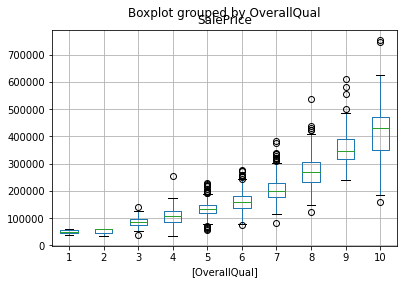

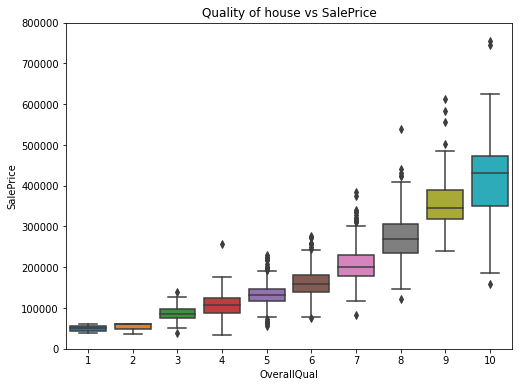

In [10]:
# Now we compare OverallQual and SalePrice.
# OverallQual is a categorical variable, we will use a boxplot.
# I think we can use pandas to plot this as well, but the tutorial uses Seaborn.
# I will show both.
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

# plotting with pandas
data.boxplot(by=var)

# plotting with seaborn
f, ax = plt.subplots(figsize=(8, 6))
f = sns.boxplot(x=var, y="SalePrice", data=data)
f.axis(ymin=0, ymax=800000)
# they originally had fig = sns.boxplot... but I changed it to f. Maybe that's what they intended??

# the f, ax =... line allows you to change specific things about the figure or the axes.
# I think how it works is that you define a figure with plt.subplots(), and you can modify it.
# You unpack the tuple so you can target the figure/axes separately for more complex graphs.
# When you call plt.subplots() again, you define a new plot, so there's only one plot defined at a time??
# I don't really get it, but it's not important right now
# Here's a demo though:
ax.set(title='Quality of house vs SalePrice')  # you can only target the axes like this.

# CONCLUSION: Saleprice goes up when 'OverallQual' increases. Inter Quartile Range also increases and
# there are more outliers for higher values.

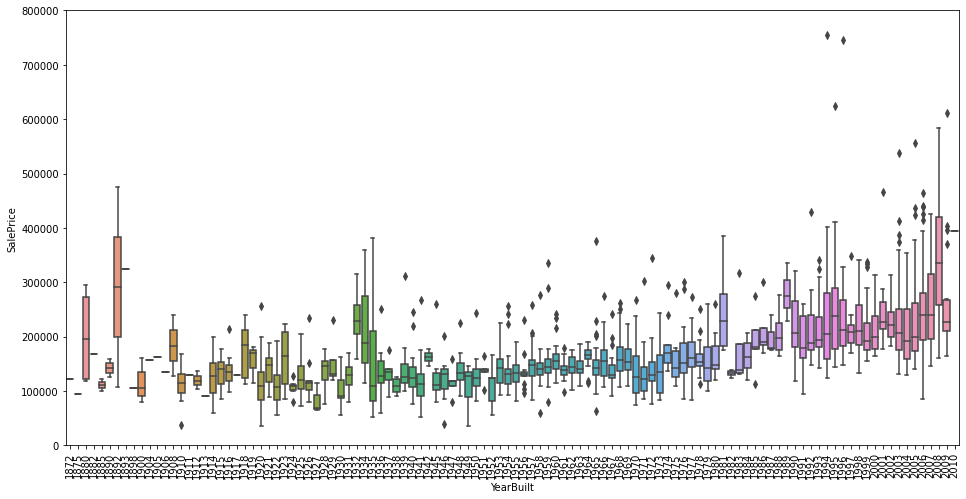

In [11]:
# Let's do the same for 'YearBuilt' now. I will only use Seaborn.

var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))

f = sns.boxplot(x=var, y='SalePrice', data=data)
ax.set_ylim(bottom=0, top=800000)
_ = plt.xticks(rotation=90)
# assign it to _ to not see the output.

# I targeted the figure and axes separately this time?? Did I do it right??
# CONCLUSION: saleprice is higher in more recent houses. Hopefully these prices are adjusted for inflation.


In [12]:
# OVERALL CONCLUSION
# GrLivArea/TotalBsmtSF both have a positive linear association with SalePrice. TotalBsmtSF has a higher slope.
# OverallQual and YearBuilt are also associated with SalePrice. OverallQual seems to be stronger association though...

# now, it's time to be EVEN MORE objective about our analysis...
print('yeah!')

yeah!


<AxesSubplot:>

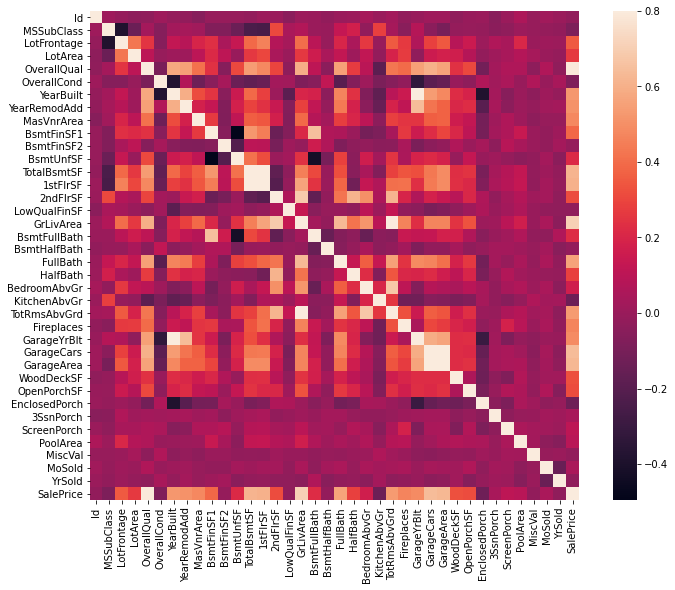

In [13]:
# Correlation matrix time.
# I hope you know what correlation is. I learned about it from linear regression.

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
# Note: vmax is the upper bound for the 'high' indicator color.
# if you set it lower, then there will be more heat in general on the heatmap.
# Try setting it to 0.2, see what happens lol

# CONCLUSION: we look for two things: first is large, white spaces.
# eg. TotalBsmtSF and 1stFlrSF. The correlation between these makes sense, because larger basement -> larger 1st floor??
# also, there's a box with all the GarageX variables. Makes sense because the no. cars you can fit in your garage is probably
# correlated with the amount of space in the garage, so...

# next, we look at saleprice, to see what it's correlated with. We see that it's correlated with many of the variables we
# already analyzed, and yeah!

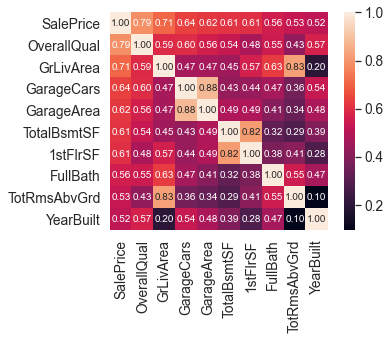

In [14]:
# Zoomed Heatmap
# Basically, we take the top 10 correlated variables for SalePrice and we make a heatmap of those now.
# Let's us better understand the most relevant variables we should use.
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# gets the 10 highest correlated variables to saleprice, then only selects the 'SalePrice' column
# Basically, we have the indices to certain columns like the 'SalePrice' column, etc.

cm = np.corrcoef(df_train[cols].values.T)
# no idea what this is, doesn't matter to me at this moment lol

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()
# I am not really concerned with all these parameters at the moment. All I know is that a heatmap was created on this day.

# CONCLUSION: we see a lot of the variables we looked at earlier in this heatmap.
# we see some variables that could be correlated to each other, such as TotalBsmtSF/1stFlrSF, GarageCars/Area
# What do we do?

# Definitely keep OverallQual
# GrLivArea...keep that as well. We already looked at that earlier, so...

# GarageCars and area are strongly correlated with each other. We could keep GarageCars because it
# has a stronger correlation to SalePrice

# Same for TotalBsmtSF and 1stFlrSF. We already looked at TotalBsmtSF, so why don't we just keep that.
# Shouldn't make much of a difference

# Fullbath?? ok
# TotRmsAbvGrd...it's highly correlated with GrLivArea...maybe we keep it? Maybe we dont? I kinda wanna not keep it
# because I'm lazy. Actually would it be more work to remove the variable? LOL

# YearBuilt. Kaggle guy was scared cuz time series analysis may be needed here. Luckily, I never learned that
# Got nothing to fear. Easy game!

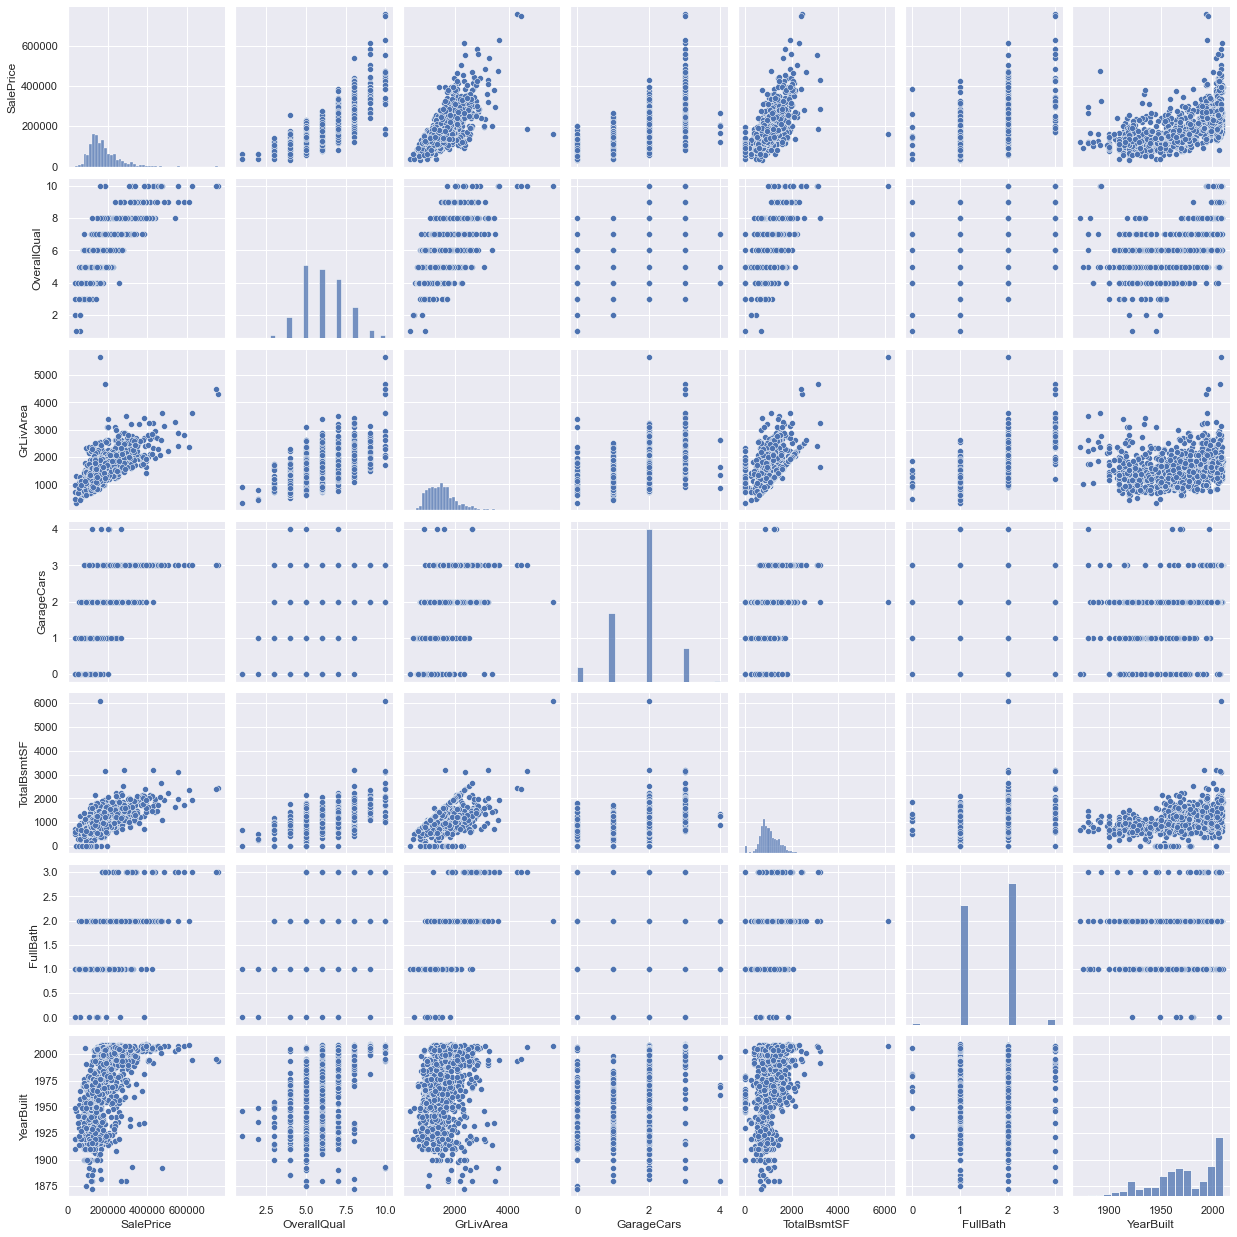

In [15]:
# Scatterplot time. Time to look at a lot of data...
sns.set() 
# sets the seaborn blue default theme. In older versions of seaborn, this is called on import.
# sns.set_style('whitegrid')
# just an example of how you can change the graph appearance. Don't like this theme though...

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
# you can change kind='scatter' to something else, but yeah.
# How do you plot a histogram for two variables though?? idk lol
plt.show()

# CONCLUSION:
# GrLivArea as a function of TotalBsmtSF: linear pattern and then most dots are below that line.
# makes sense, Basement is usually <= the size of the ground floor.

# Yearbuilt as a function of SalePrice: see an almost exponential function in the bottom/upper dots.
# some of the more recent years have dots that stay above the "linear" relationship.
# Basically, current houses are a getting expensive a bit fast...

In [16]:
# MISSING DATA TIME
# This section contains a lot of data wrangling concepts.
# I know all of them, but I don't really know how to implement them in python. Yet.

# How prevalent is the missing data?
# Is missing data random or does it have a pattern?

a = df_train.isnull().sum(axis=0)
# You can look at what A returns. It's a dataframe that counts the NA values.
# Axis defaults to 0 but I put it there anyways
total = a.sort_values(ascending=False)
# This just sorts it in descending order.

percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
# Basically calculates the percent of total missing values for each thing
# TODO Learn how to add new columns to pandas dataframe(mutate in r basically lol)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
# Puts everything in a table and looks at the first 20 entries
# Percent is actually in decimal, so the top one is like 99% by the way.

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [17]:
# Basic Guidelines for handling missing data(according to bruh)
# If more than 15% of the data is missing, we should probably just delete the variable
# Usually, the variable wasn't important in the first place so...

# We can delete the top few variables. They aren't really important anyways.

# GarageX variables have the same number of missing data. These variables are correlated with each other, so
# We can just keep one. Earlier, we already said we would just keep GarageCars, so I guess we'll do that.

# Do the same for BsmtX variables. We can just keep BsmtQual or Cond I guess
# We have one missing observation in "Electrical." Let's just delete that observation and call it a day

df_train = df_train.drop((missing_data[missing_data['Total']>1]).index, 1)
# The inside just involves selecting all columns with >1 NA values(remember we are keeping Electrical)
# Note that we can put a logical condition inside Dataframe.loc() so that's how that works.
# We delete the corresponding columns(axis=1) in df_train.

df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
# drops that single electrical observation that's missing. Note that we remove the row(axis=0 by default) this time.

df_train.isnull().sum().max()
# just makes sure that there are no more na values.

0

In [18]:
# Outlier time!

# Univariate analysis
# We must establish a threshold that defines an observation as an outlier.
# To do so, we standardize the data

saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])
# fit_transform fits data and transforms it.
# from df_train, we take the saleprice column and add a new axis to it. Note [:] selects everything in the dataframe.
# numpy.newaxis can be used in any slicing operation to create an axis of length 1.
# So basically we fit the saleprice data and yeah.

low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]
# argsort returns the indices of data sorted ascending order.
# notice saleprice_scaled[:, 0] selects all rows and only the first column(SalePrice)
# saleprice_scaled[...argsort()] will essentially get the sorted data, then we take the first 10 values(lowest)
# for the high_range, we take the last 10(highest) values

print('outer range(low) of the distribution: \n', low_range)
print('\nouter range(high) of the distribution: \n', high_range)

# How SalePrice looks after standardization:
# Low range values are similar and close to 0
# High range values are far from 0 and some of the values are really out of range.

outer range(low) of the distribution: 
 [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range(high) of the distribution: 
 [[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

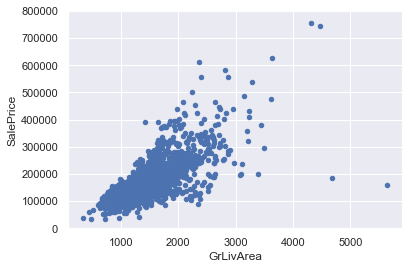

In [19]:
# Bivariate Analysis
# Univariate Analysis is great and all, but we may get more insights if we compare saleprice
# to other variables and see the outliers.

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

# Most values follow a linear trend. However,
# Two values have low saleprice and have high GrLivArea. This may be agricultural land, which is worth less than
# a house. All in all, these points do not represent a typical case.
# we'll define these as outliers and delete them
# Two values also have really high salePrice. These may be the outliers we saw earlier. They seem to follow the linear
# trend, so maybe we'll keep them?

In [20]:
# deleting points
df_train.sort_values(by='GrLivArea', ascending=False)[:2]
# yup these are the ones we wanted, check the salePrice for confirmation
df_train = df_train.drop(df_train[df_train['Id']==1299].index)
df_train = df_train.drop(df_train[df_train['Id']==1299].index)
# we get the indices of these two observations and delete them.

print("done")

done


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

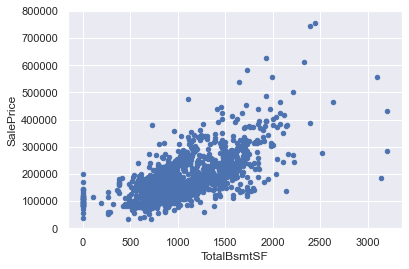

In [21]:
# Bivariate Analysis for the next variable.
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

# We could eliminate some observations, but everything approximately follows the linear trend,
# so we'll leave it as is for now.

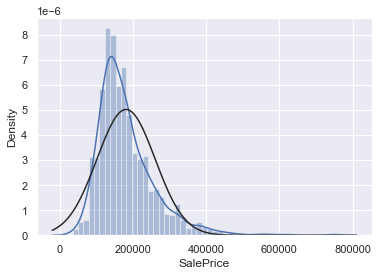

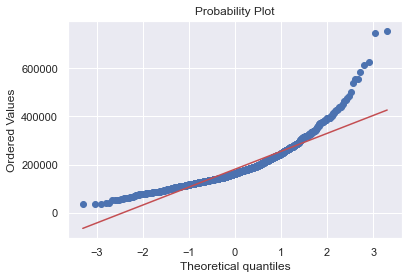

In [26]:
# Getting Hardcore...?
# In order to apply multivariate techniques, many statistical assumptions must be satisfied.
# (I learned these in class, but I never had to manipulate data to satisfy these assumptions)
# Normality: Data should look like  a normal distribution. Several stats test rely on this.
# Homoscedasticity: Dependent variables exhibit equal levels of variance across the range of predictor variables.
# - AKA Your scatter plots don't look like a cone shape or something like that.
# Linearity: If patterns aren't linear, it's worthwhile to explore data transformations.
# Absence of correlated errors: creating new variables to explain the correlation is a common solution to this.

# How do we look for normality?
# - Histogram: tells us about kurtosis and skewness
# - Normal probability plot: distribution should follow the diagonal that represents the normal probability distribution

sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure() # creates a new figure
res = stats.probplot(df_train['SalePrice'], plot=plt)
# norm is from scipy.stats is a figure with 0 axes btw.
# probplot is a graphical technique for assessing whether or not a data set follows a given distribution(normal)

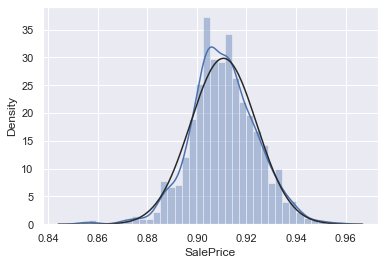

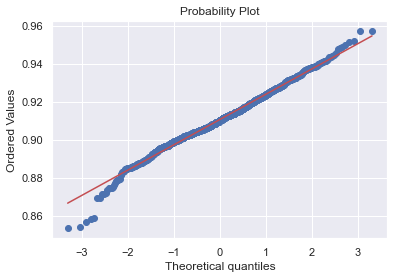

In [29]:
# shows peakedness(data values heavily concentrated around mean) and positive skewness, doesn't follow diagonal line.
# We can do a data transformation. Log transformations work well in case of positive skewness

df_train['SalePrice'] = np.log(df_train['SalePrice']) # Logs everything
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
# Yeah if you don't do this line it graphs both plots on the same plot so...do this...
res = stats.probplot(df_train['SalePrice'], plot=plt)

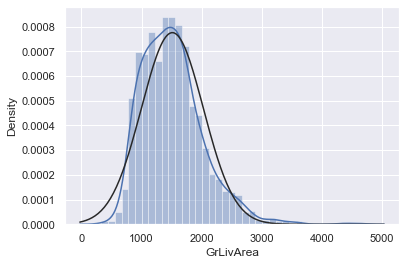

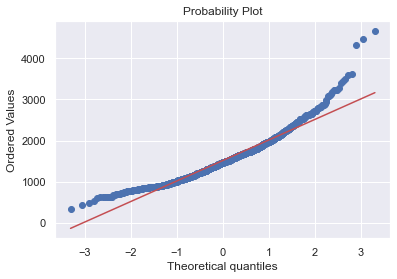

In [30]:
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure() # creates a new figure
res = stats.probplot(df_train['GrLivArea'], plot=plt)

# doesn't follow thenormal distribution, the histogram shows that this distribution is slightly right skewed

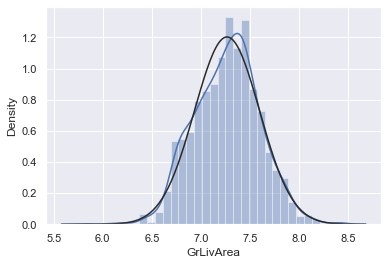

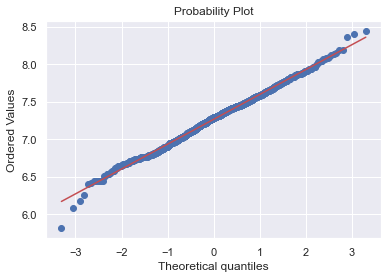

In [31]:
# Let's log again
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure() # creates a new figure
res = stats.probplot(df_train['GrLivArea'], plot=plt)

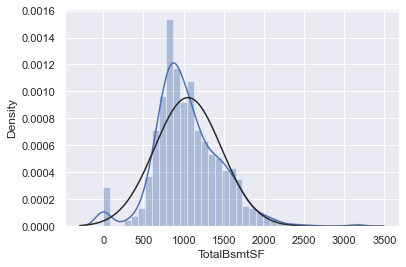

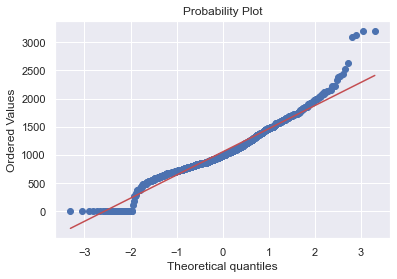

In [32]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure() # creates a new figure
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

# Difficulty: Hard
# right skewed, big peak
# Lots of observations with value 0, which doesn't allow us to do log transformations

# Solution:
# Create a variable that can get the effect of having/not having basement. Then we log all the non-zero observations.

In [33]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0
# Creates a new series and sets everything in the series to 0
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1
# Sets all the observations with a basement to 1(HasBsmt)

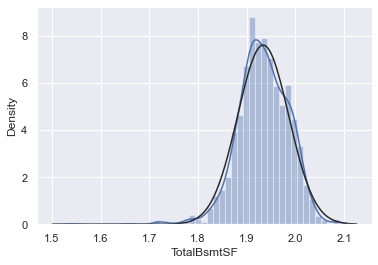

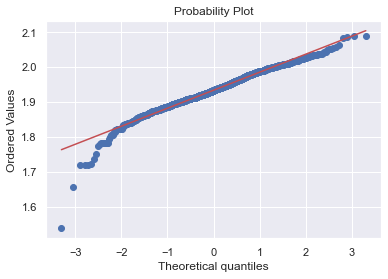

In [35]:
# Transform
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
# Transforms the TotalBsmtSF observations with HasBsmt = 1.

# Plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
# We plot the TotalBsmtSF for those with value > 0
fig = plt.figure() # creates a new figure
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

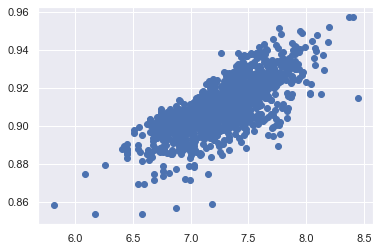

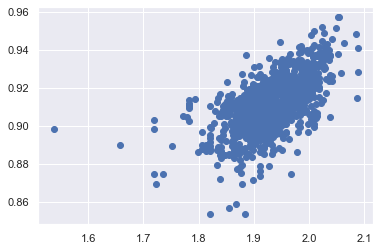

In [38]:
# Homoscedasticity
# We can look graphically to test for homoscedasticity
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
fig = plt.figure()
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

# these plots used to be cone shaped, but after transformations, it's good!

In [41]:
# Dummy Variables
# convert categorical variables into dummy variables(numerical indicators)
df_train = pd.get_dummies(df_train)

In [42]:
# CONCLUSION:
# In this notebook, we practiced a few strategies proposed by Hair et al.(2013) What did we do?

# Some intuitive feature selection, basic data visualization(scatterplots and boxplots)
# Correlation matrix heatmap, zoomed heatmap and scatterplots
# Dealing with missing values
# Dealing with outliers and looking for outliers numerically and graphically.
# Manipulating data to satisfy linearity.
print("cool")

cool


In [43]:
# Regularized Linear Models time
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
